In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import scipy.optimize as opt
import typing as tp
from numba import njit
from matplotlib import cm

### Задача 1

In [255]:
x=[0.1,0.10808081,0.11616162,0.12424242,0.13232323,0.14040404,
   0.14848485,0.15656566,0.16464646,0.17272727,0.18080808,
   0.18888889,0.1969697,0.20505051,0.21313131,0.22121212,
   0.22929293,0.23737374,0.24545455,0.25353535,0.26161616,
   0.26969697,0.27777778,0.28585859,0.29393939,0.3020202,
   0.31010101,0.31818182,0.32626263,0.33434343,0.34242424,
   0.35050505,0.35858586,0.36666667,0.37474747,0.38282828,
   0.39090909,0.3989899,0.40707071,0.41515152,0.42323232,
   0.43131313,0.43939394,0.44747475,0.45555556,0.46363636,
   0.47171717,0.47979798,0.48787879,0.4959596,0.5040404,
   0.51212121,0.52020202,0.52828283,0.53636364,0.54444444,
   0.55252525,0.56060606,0.56868687,0.57676768,0.58484848,
   0.59292929,0.6010101,0.60909091,0.61717172,0.62525253,
   0.63333333,0.64141414,0.64949495,0.65757576,0.66565657,
   0.67373737,0.68181818,0.68989899,0.6979798,0.70606061,
   0.71414141,0.72222222,0.73030303,0.73838384,0.74646465,
   0.75454545,0.76262626,0.77070707,0.77878788,0.78686869,
   0.79494949,0.8030303,0.81111111,0.81919192,0.82727273,
   0.83535354,0.84343434,0.85151515,0.85959596,0.86767677,
   0.87575758,0.88383838,0.89191919,0.9]

y = [-2.24812911, -2.30215341, -2.34463875, -2.38651064,
     -2.43190693, -2.44713884, -2.49003176, -2.51006098, 
     -2.55831541, -2.57056931, -2.59340317, -2.64026441, 
     -2.65975636, -2.69517476, -2.71046599, -2.74422696, 
     -2.76251291, -2.79505506, -2.79301352, -2.82852207, 
     -2.854651, -2.88654236, -2.92345136, -2.91943321, 
     -2.94240833, -2.9487781, -2.97926813, -2.99198343, 
     -3.03396292, -3.03814694, -3.04944858, -3.07196161, 
     -3.09883706, -3.11338258, -3.11898122, -3.14254571, 
     -3.18330957, -3.17453301, -3.20021237, -3.21213539, 
     -3.23715191, -3.24017664, -3.23640684, -3.26147762, 
     -3.28208909, -3.29453546, -3.31160478, -3.33188752, 
     -3.33320305, -3.35238927, -3.34176317, -3.37471911, 
     -3.37543159, -3.40452694, -3.40505804, -3.43358858, 
     -3.43596139, -3.43705603, -3.45264647, -3.46029402, 
     -3.45723979, -3.4720453, -3.47597438, -3.4795529, 
     -3.50118552, -3.5031452, -3.5097196, -3.51083668, 
     -3.51128397, -3.52708836, -3.5222885, -3.53317295, 
     -3.50965143, -3.51939652, -3.51659198, -3.50734187, 
     -3.50882329, -3.48129755, -3.49384658, -3.48813707, 
     -3.48345018, -3.46180698, -3.44784696, -3.42372263, 
     -3.39080674, -3.37867045, -3.35281766, -3.32575498, 
     -3.28934964, -3.26814804, -3.23547615, -3.1707224, 
     -3.12910072, -3.09300443, -3.02523152, -2.9453774, 
     -2.89454317, -2.83662685, -2.75433056, -2.68946573]

In [256]:
func = lambda x, w1, w2, w3, w4: np.power(x, w2) * w1 + np.power(x, w4) * w3
param_curve_fit, cov_matrix = opt.curve_fit(func, x, y, p0 = [20, 4, -30, 3])
print(param_curve_fit)
print(cov_matrix)

[ 3.00860854  8.5844716  -3.9962949   0.24936605]
[[ 8.85070526e-04  2.15568654e-03  5.48151892e-05 -9.31717896e-06]
 [ 2.15568654e-03  6.50965592e-03  2.46223952e-04 -4.46944024e-05]
 [ 5.48151892e-05  2.46223952e-04  1.68896778e-05 -3.34831788e-06]
 [-9.31717896e-06 -4.46944024e-05 -3.34831788e-06  7.74351930e-07]]


In [257]:
param_polynom = np.polyfit(x, y, 4)
print(param_polynom)

[ 22.31513595 -37.72653678  24.99906654  -9.54808903  -1.50612742]


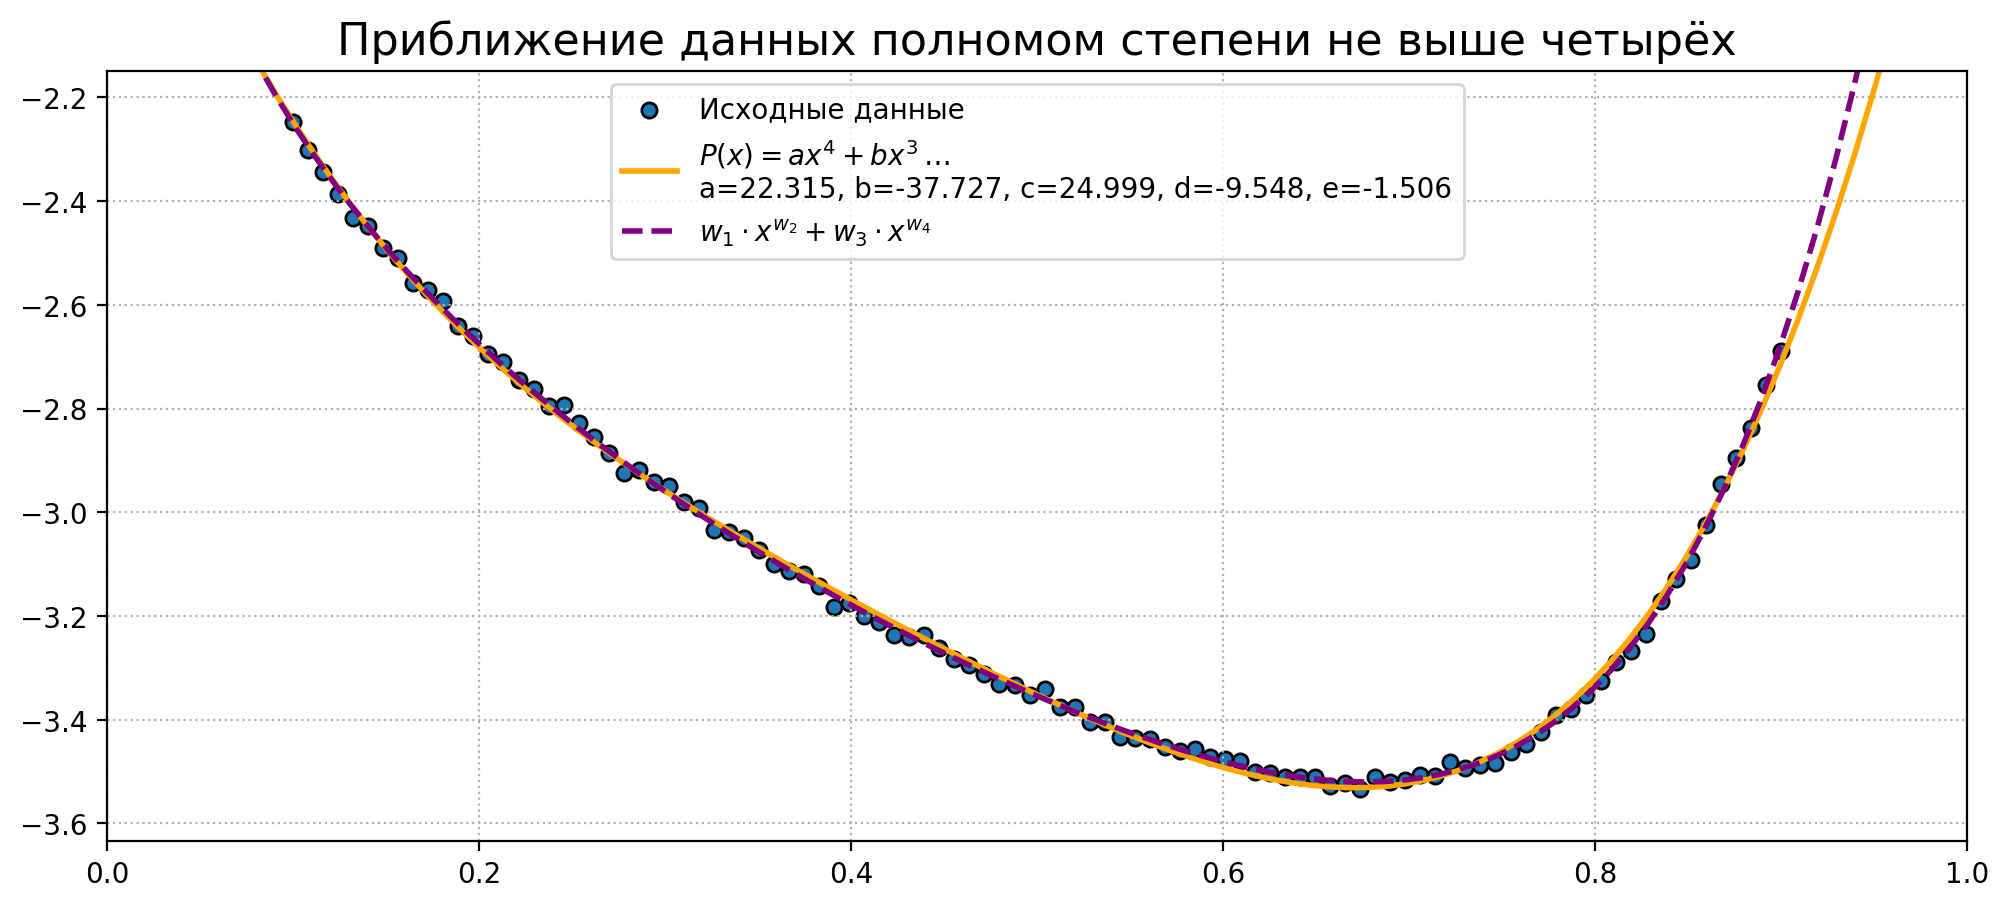

In [258]:
plt.figure(figsize = (12, 5), dpi = 200)

x_line = np.linspace(0, 1, 100)
plt.scatter(x, y, s = 30, edgecolor = 'k', label = 'Исходные данные')
plt.plot(x_line, np.poly1d(param_polynom)(x_line), color = 'orange', linewidth = 2, label = '$P(x) = a x^4 + b x^3 \dots$\na=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f' % tuple(param_polynom))
plt.plot(x_line, func(x_line, *param_curve_fit), color = 'purple', linewidth  = 2, linestyle = '--', label = r'$w_1 \cdot x^{w_2} + w_3 \cdot x^{w_4}$')
plt.xlim(np.min(x) - 0.1, np.max(x) + 0.1)
plt.ylim(np.min(y) - 0.1, np.max(y) + 0.1)
plt.title("Приближение данных полномом степени не выше четырёх", fontsize = 16)
plt.legend()
plt.grid(ls = ":")

### Задача 2

Найти точку локального минимума функции $f(x) = 2 x^{2} - \operatorname{ln}(x)$ и функции $f(t) = (t^{2} - 3) / (t + 2)$

In [54]:
@njit
def fibbonaci_count(N: int) -> np.ndarray:
    numeron = np.ascontiguousarray(np.zeros(N, dtype = np.ulonglong))
    numeron[0] = np.ulonglong(1)
    numeron[1] = np.ulonglong(1)
    for i in np.arange(2, N, 1):
        numeron[i] = numeron[i - 1] + numeron[i - 2]
    return numeron

fibbonaci_numbers = fibbonaci_count(70)

In [55]:
print(fibbonaci_numbers[-1])

190392490709135


In [56]:

def fibbonaci_minimization(func: tp.Callable, left_boubd: float = -1.6, right_bound: float = 1.6, N: int = 70):
    """Минимизация функции методом фиббоначи

    Args:
        func (tp.Callable): Минимизируемая функция
        left_boubd (float, optional): Левая граница отрезка на котором минимизируется функция
        right_bound (float, optional): Правая граница отрезка на котром минимизируется функция
        N (int, optional): Число итераций. Defaults to 100.
    """
    history = {"a": [], "b": [], "x1": [], "x2": []}
    a, b = left_boubd, right_bound
    for n in np.arange(N - 1, 1, -1, dtype = np.int64):
        x1 = a + (b - a) * fibbonaci_numbers[n - 2] / fibbonaci_numbers[n]
        x2 = a + (b - a) * fibbonaci_numbers[n - 1] / fibbonaci_numbers[n]
        history["a"].append(a)
        history["b"].append(b)
        history["x2"].append(x2)
        history["x1"].append(x1)
        if func(x1) > func(x2): 
            a = x1      
        else:  
            b = x2

    return (x1 + x2) / 2, history
            
            

In [262]:
f1 = lambda x: 2 * np.power(x, 2) - np.log(np.abs(x) + 1e-6)
f2 = lambda t: (np.power(t, 2) - 3) / ((t + 2))

min_f1, _ = fibbonaci_minimization(f1, N = 50)
min_f2, history = fibbonaci_minimization(f2, N = 20)
print(min_f1, min_f2)

0.4999994964274175 -1.0002069475240205


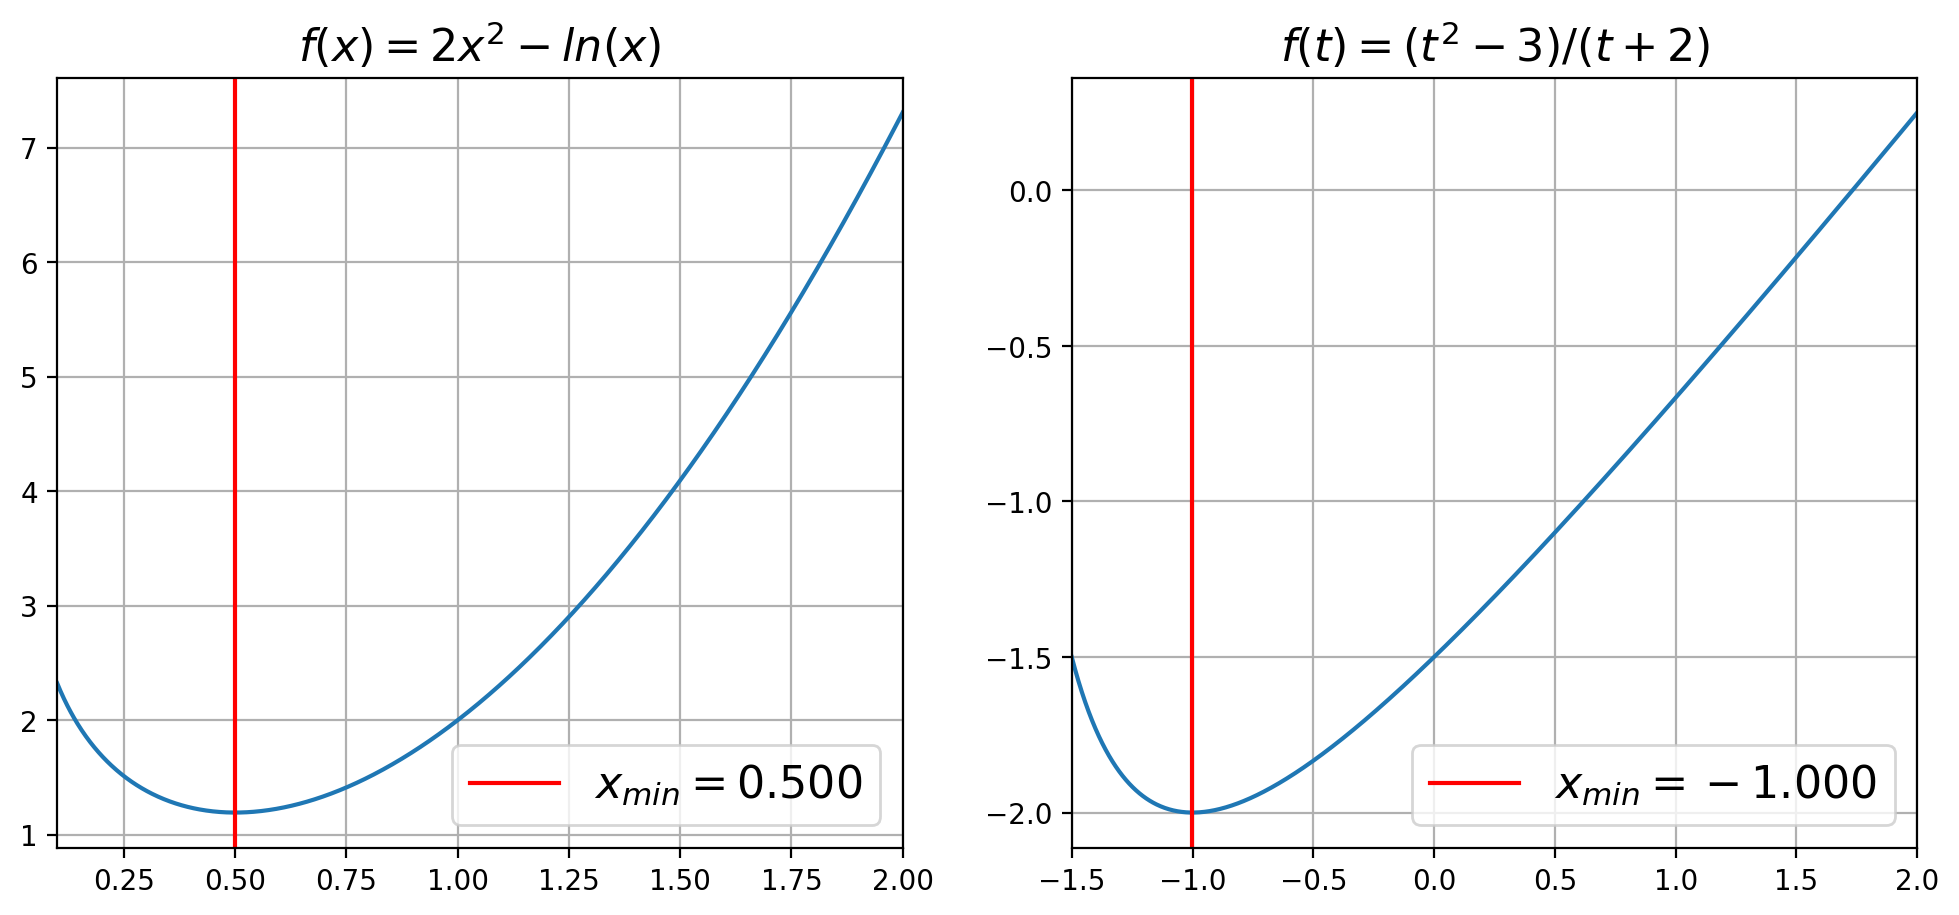

In [263]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi = 200)

x_line_1 = np.linspace(0.1, 2, 1000)
ax[0].plot(x_line_1, f1(x_line_1))
ax[0].axvline(min_f1, color = 'red', label = r'$x_{min} = %5.3f$' % min_f1)
ax[0].set_xlim(0.1, 2)
ax[0].set_title(r"$f(x) = 2x^{2} - ln(x)$", fontsize = 16)

x_line_2 = np.linspace(-1.5, 2, 1000)
ax[1].plot(x_line_2, f2(x_line_2))
ax[1].axvline(min_f2, color = 'red', label = r'$x_{min} = %5.3f$' % min_f2)
ax[1].set_xlim(-1.5, 2)
ax[1].set_title(r"$f(t) = (t^{2} - 3) / (t + 2)$", fontsize = 16)

for a in ax:
    a.legend(fontsize = 16)
    a.grid()

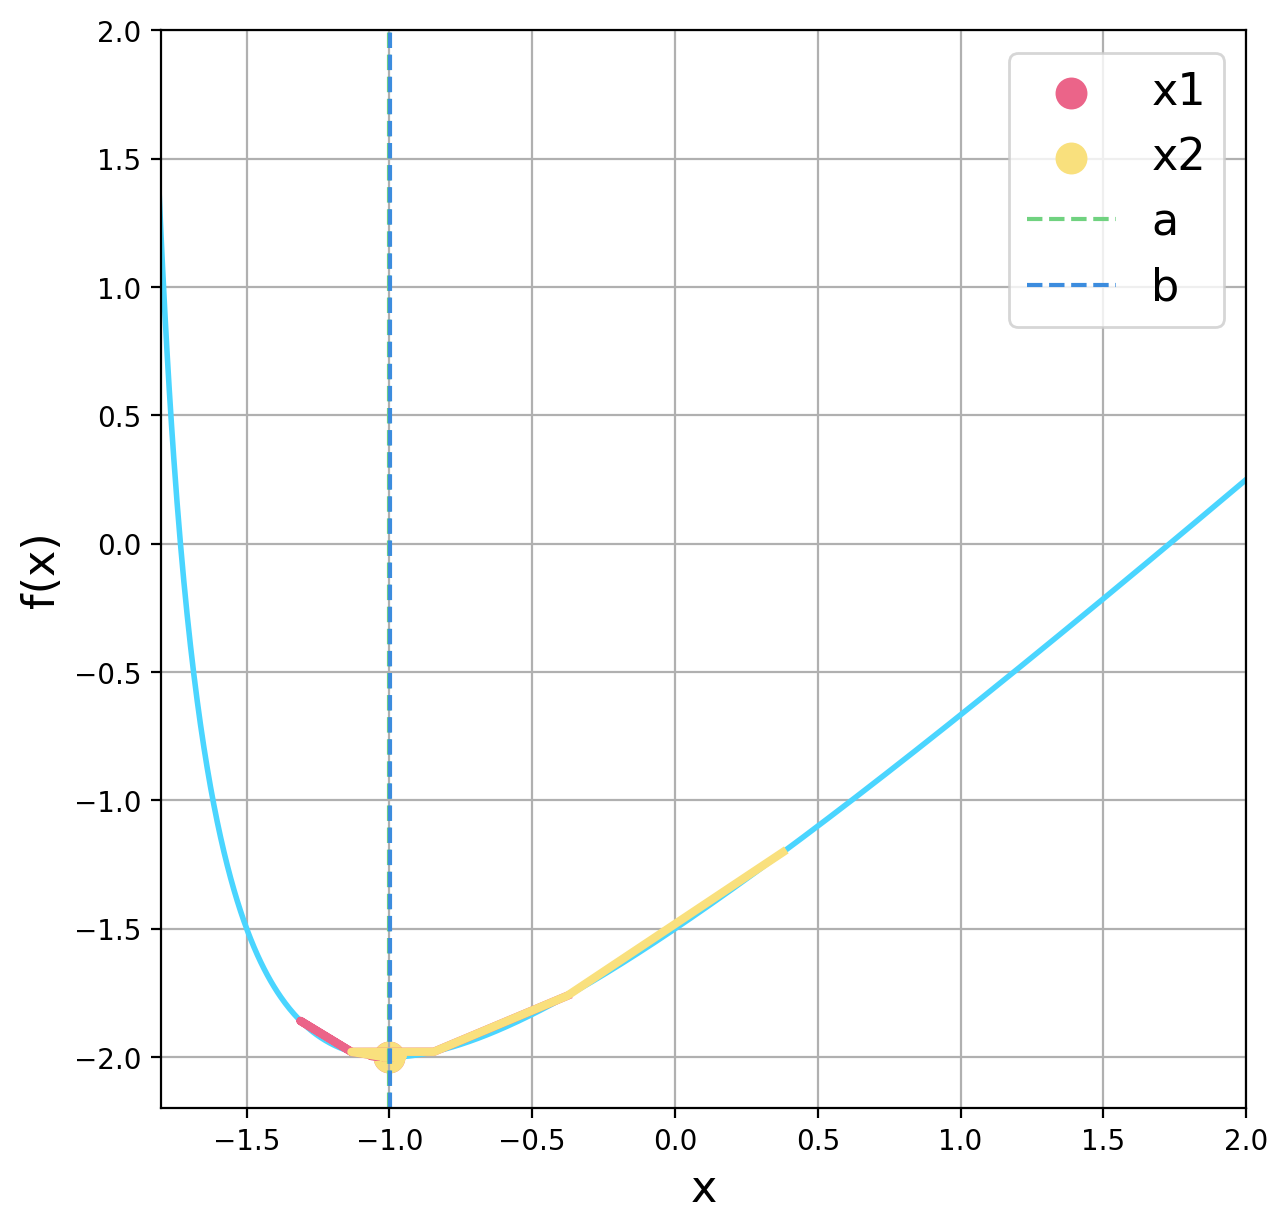

In [264]:
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots(figsize = (7, 7), dpi = 200)
x = np.linspace(-1.9, 2, 1000)
line, = ax.plot(x, f2(x), lw=2)

def init():
    line.set_ydata(np.ma.array(x, mask=True))
    ax.set_xticks(np.arange(-2, 2.5, 0.5))
    ax.set_xlim(-1.8, 2)
    ax.grid()
    ax.set_xlabel('x', fontsize = 16)
    ax.set_ylabel('f(x)', fontsize = 16)
    ax.set_ylim(-2.2, 2)
    return line,


def update(frame):
    ax.clear()
    ax.set_xticks(np.arange(-2, 2.5, 0.5))
    ax.set_xlim(-1.8, 2)
    ax.grid()
    ax.plot(x, f2(x), lw = 2, color = '#4ad5ff')
    ax.plot(history['x1'][:frame + 1], f2(np.array(history['x1'][:frame + 1])), color = '#eb6489', lw = 3)
    ax.plot(history['x2'][:frame + 1], f2(np.array(history['x2'][:frame + 1])), color = '#f9e07d', lw = 3)
    ax.scatter(history['x1'][frame], f2(history['x1'][frame]), color = '#eb6489', label = 'x1', s = 110)
    ax.scatter(history['x2'][frame], f2(history['x2'][frame]), color = '#f9e07d', label = 'x2', s = 110)
    ax.axvline(x = history['a'][frame], linestyle='--', color='#70d280', label='a')
    ax.axvline(x = history['b'][frame], linestyle='--', color='#3c8cde', label='b')
    ax.legend(loc = 'upper right', fontsize = 16)
    ax.set_xlabel('x', fontsize = 16)
    ax.set_ylabel('f(x)', fontsize = 16)
    ax.set_ylim(-2.2, 2)
    return line,

ani = FuncAnimation(fig, update, frames = len(history['x1']), init_func = init, blit = True)
ani.save("f2_minimization_fibb.mp4", fps = 2, extra_args=['-vcodec', 'libx264'])

### Задача 3

In [41]:
rastrigin_f_min = lambda x: 20 + np.power(x[0], 2) + np.power(x[1], 2) - 10 * np.cos(np.pi * x[0] * 2) - 10 * np.cos(np.pi * x[1] * 2)
rastrigin_f = lambda x1, x2: 20 + np.power(x1, 2) + np.power(x2, 2) - 10 * np.cos(np.pi * x1 * 2) - 10 * np.cos(np.pi * x2 * 2)
x1_line = np.linspace(-2, 2, 1000)
x2_line = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x1_line, x2_line)
X0, Y0 = np.meshgrid(x1_line[::20], x2_line[::20])

grid = np.vstack([X0.flatten(), Y0.flatten()]).T
minimums = []
for x0 in grid:
    minimums_scipy_obj = opt.minimize(rastrigin_f_min, x0 = x0)
    minimums.append(minimums_scipy_obj.x)
    
minimums = np.array(minimums)

(50, 50)
(2500, 2)


In [42]:
print(minimums.shape)

(2500, 2)


In [43]:
print(minimums[0,:].shape)

(2,)


Text(0.5, 1.0, 'Минимумы функции Растригина(обозначены черным)')

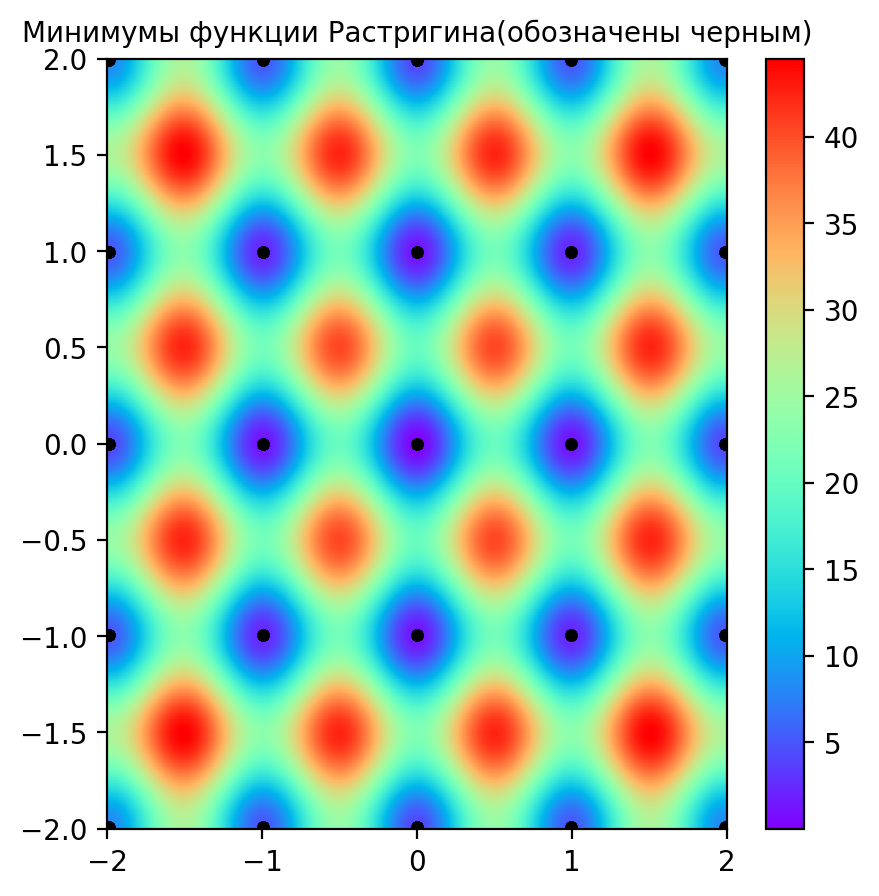

In [47]:
plt.figure(figsize = (5, 5), dpi = 200)
im = plt.pcolormesh(X, Y, rastrigin_f(X, Y), cmap = 'rainbow')
plt.scatter(minimums[:,0], minimums[:, 1], color = 'black', s = 10)
plt.colorbar(im)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Минимумы функции Растригина(обозначены черным)", fontsize = 10)

### Задача 4

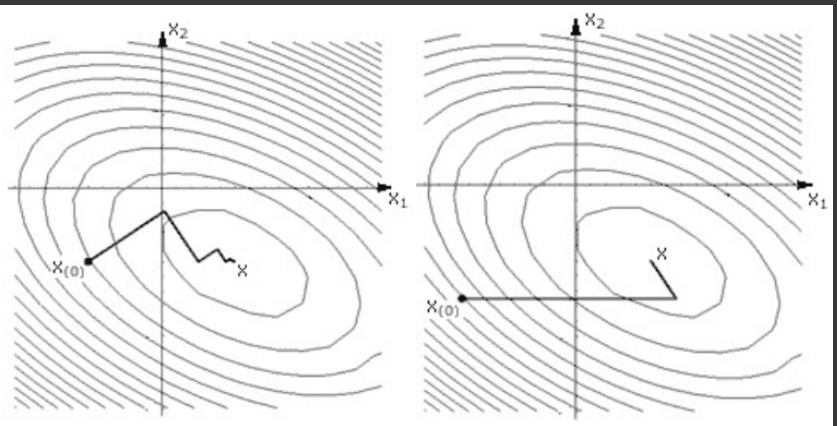

На картинке слева изображен алгоритм наискорейшего спуска. Справа - алгоритм минимизации методом сопряженных градиентов. 

__Обоснование__

- На левом рисунке движение строго перпендикулярно линиям уровней(в ортогональных направлениях).
- На правом рисунке отчетливо видно что алгоритм сходится в точке 2, и начинает движение в новом направлении.

### Задача 6*

In [2]:
def minimize(f: tp.Callable, 
             grad_f: tp.Callable,
             x0: np.ndarray, 
             Bk: tp.Callable, 
             phi_minimization: tp.Callable, 
             max_iter: int = int(1e3), 
             eps = 1e-6):
    """Минимизация методом сопряженных градиентов

    Args:
        f (tp.Callable): Минимизируемая функция: Rn -> R
        grad_f (tp.Callable): Градиент минимизируемой функции Rn -> Rn
        x0 (np.ndarray): Начальное приближение точки минимума
        Bk (tp.Callable): Метод для выбора константы Bk на k-ой итерации
        phi_minimization (tp.Callable, optional): Метод минимизации функции вдоль выбранного направления.
        max_iter (int, optional): Максимальное число итераций. Defaults to int(1e4).
        eps (_type_, optional): условие остановки на градиент. Defaults to 1e-6.
    """
    x = x0
    S = -grad_f(x0)
    history = [x0]
    while len(history) < max_iter and np.linalg.norm(grad_f(x)) > eps and np.isfinite(np.linalg.norm(x)):
        alpha_min = phi_minimization(lambda alpha: f(x + alpha * S))
        x_new = x + alpha_min * S
        Beta = Bk(rk = -grad_f(x_new), rk_prev = -grad_f(x), Sk = S)
        S = -grad_f(x_new) + Beta * S
        x = x_new
        history.append(x)
    return x, history

In [10]:
import numpy as np

Fletcher_Rievs = lambda rk, rk_prev, Sk: np.linalg.norm(rk) ** 2 / np.linalg.norm(rk_prev) ** 2
Hestenes_Stiefel = lambda rk, rk_prev, Sk: np.dot(rk, rk - rk_prev) / np.dot(Sk, rk - rk_prev)
Polak_Ribier = lambda rk, rk_prev, Sk: np.dot(rk, rk - rk_prev) / np.linalg.norm(rk_prev) ** 2
Fletcher = lambda rk, rk_prev, Sk: np.linalg.norm(rk) ** 2 / np.dot(-Sk, rk_prev)
Liu_Stei = lambda rk, rk_prev, Sk: np.dot(rk, rk - rk_prev) / np.dot(-Sk, rk_prev)
Dai_Yuan = lambda rk, rk_prev, Sk: np.linalg.norm(rk) ** 2 / np.dot(Sk, rk - rk_prev)
Hager_Zhang = lambda rk, rk_prev, Sk: np.dot(rk - rk_prev - 2 * Sk * (np.linalg.norm(rk - rk_prev) ** 2) / np.dot(Sk, rk - rk_prev), rk / np.dot(Sk, rk - rk_prev))




In [11]:
def f(x: np.ndarray):
    return 0.5 * np.sum(np.power(x, 4) - 16 * np.power(x, 2) + 5 * x, axis = 0)
def grad_f(x: np.ndarray):
    return 2 * np.power(x, 3) - 16 * x + 2.5 

In [12]:
def plot_iteration_bar(Bk_name, Bk_history, x_start, nice_res):
    fig, ax = plt.subplots(figsize = (12, 5), dpi = 200)
    
    ax.bar(x = Bk_name, height = [h.shape[0] - 1 for h in Bk_history], color = cm.Set1(nice_res))
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.set_title(f"Количество итераций, необходимых для сходимости алгоритма\n$x_0 = {x_start}$")
    ax.set_ylabel("количество итераций", fontsize = 16)

def plot_curves(Bk_name, Bk_history, x_start, lim_x = 0.5, lim_y = -0.5):
    x_line, y_line = np.linspace(-4, lim_x, 100), np.linspace(-4, lim_y, 100)
    X, Y = np.meshgrid(x_line, y_line)
    fig, ax = plt.subplots(figsize = (12, 5), dpi = 200)
    im = plt.pcolormesh(X, Y, f(np.array([X, Y])), cmap = 'rainbow', alpha = 0.3)
    plt.colorbar(im)
    plt.xticks(np.arange(-4, 5, 0.25))
    plt.xlim(-4, lim_x)
    plt.ylim(-4, lim_y)
    ax.xaxis.set_tick_params(rotation = 45)
    plt.scatter([x_start[0]], [x_start[1]], color = 'black')


    for ind, (name, hist) in enumerate(zip(Bk_name, Bk_history)):
        plt.plot(hist[:, 0], hist[:, 1], label = name, color = cm.tab20(ind / len(Bk_name)), linewidth = 2)

    plt.grid()
    plt.legend()
    plt.title(f"Минимизация двумерной функции Стайблински-Танга методом сопряженных градиентов\n$x_0 = {x_start}$");

/tmp/ipykernel_3626/191118262.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  Fletcher = lambda rk, rk_prev, Sk: np.linalg.norm(rk) ** 2 / np.dot(-Sk, rk_prev)
/tmp/ipykernel_3626/2975547146.py:23: RuntimeWarning: invalid value encountered in multiply
  alpha_min = phi_minimization(lambda alpha: f(x + alpha * S))
/tmp/ipykernel_3626/133927662.py:2: RuntimeWarning: invalid value encountered in subtract
  return 0.5 * np.sum(np.power(x, 4) - 16 * np.power(x, 2) + 5 * x, axis = 0)
/tmp/ipykernel_3626/133927662.py:4: RuntimeWarning: invalid value encountered in subtract
  return 2 * np.power(x, 3) - 16 * x + 2.5
/tmp/ipykernel_3626/191118262.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  Dai_Yuan = lambda rk, rk_prev, Sk: np.linalg.norm(rk) ** 2 / np.dot(Sk, rk - rk_prev)


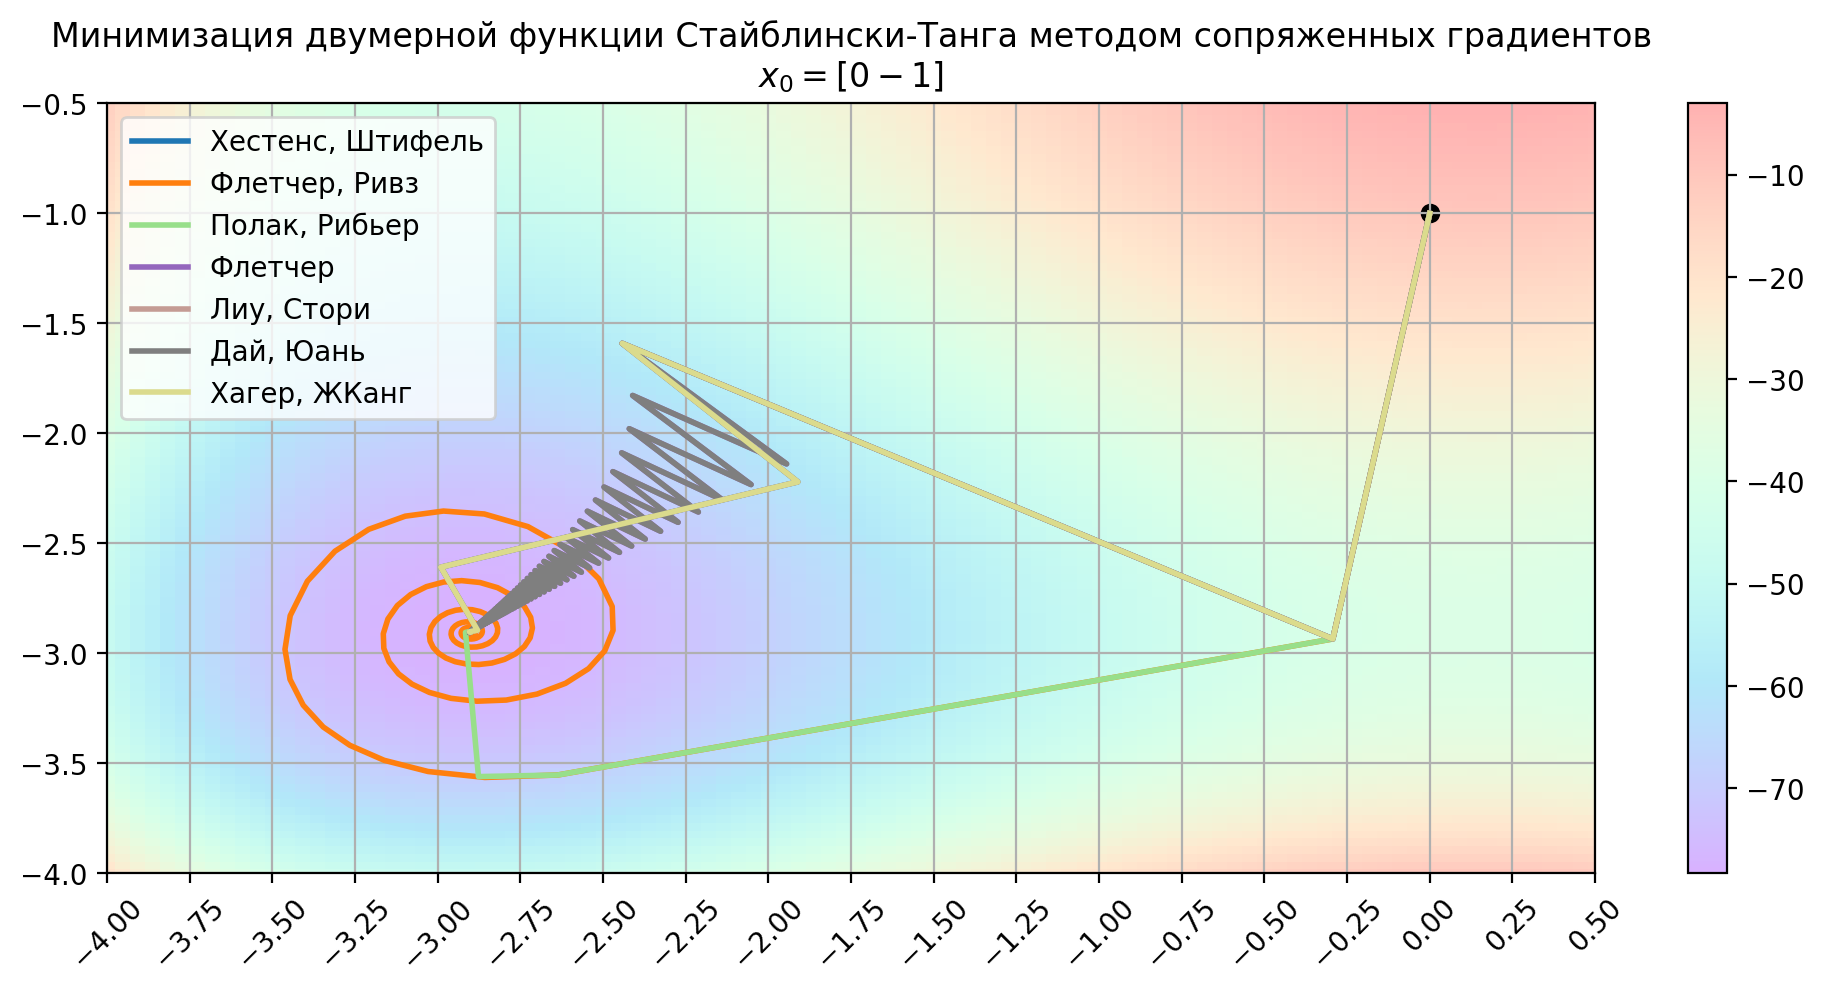

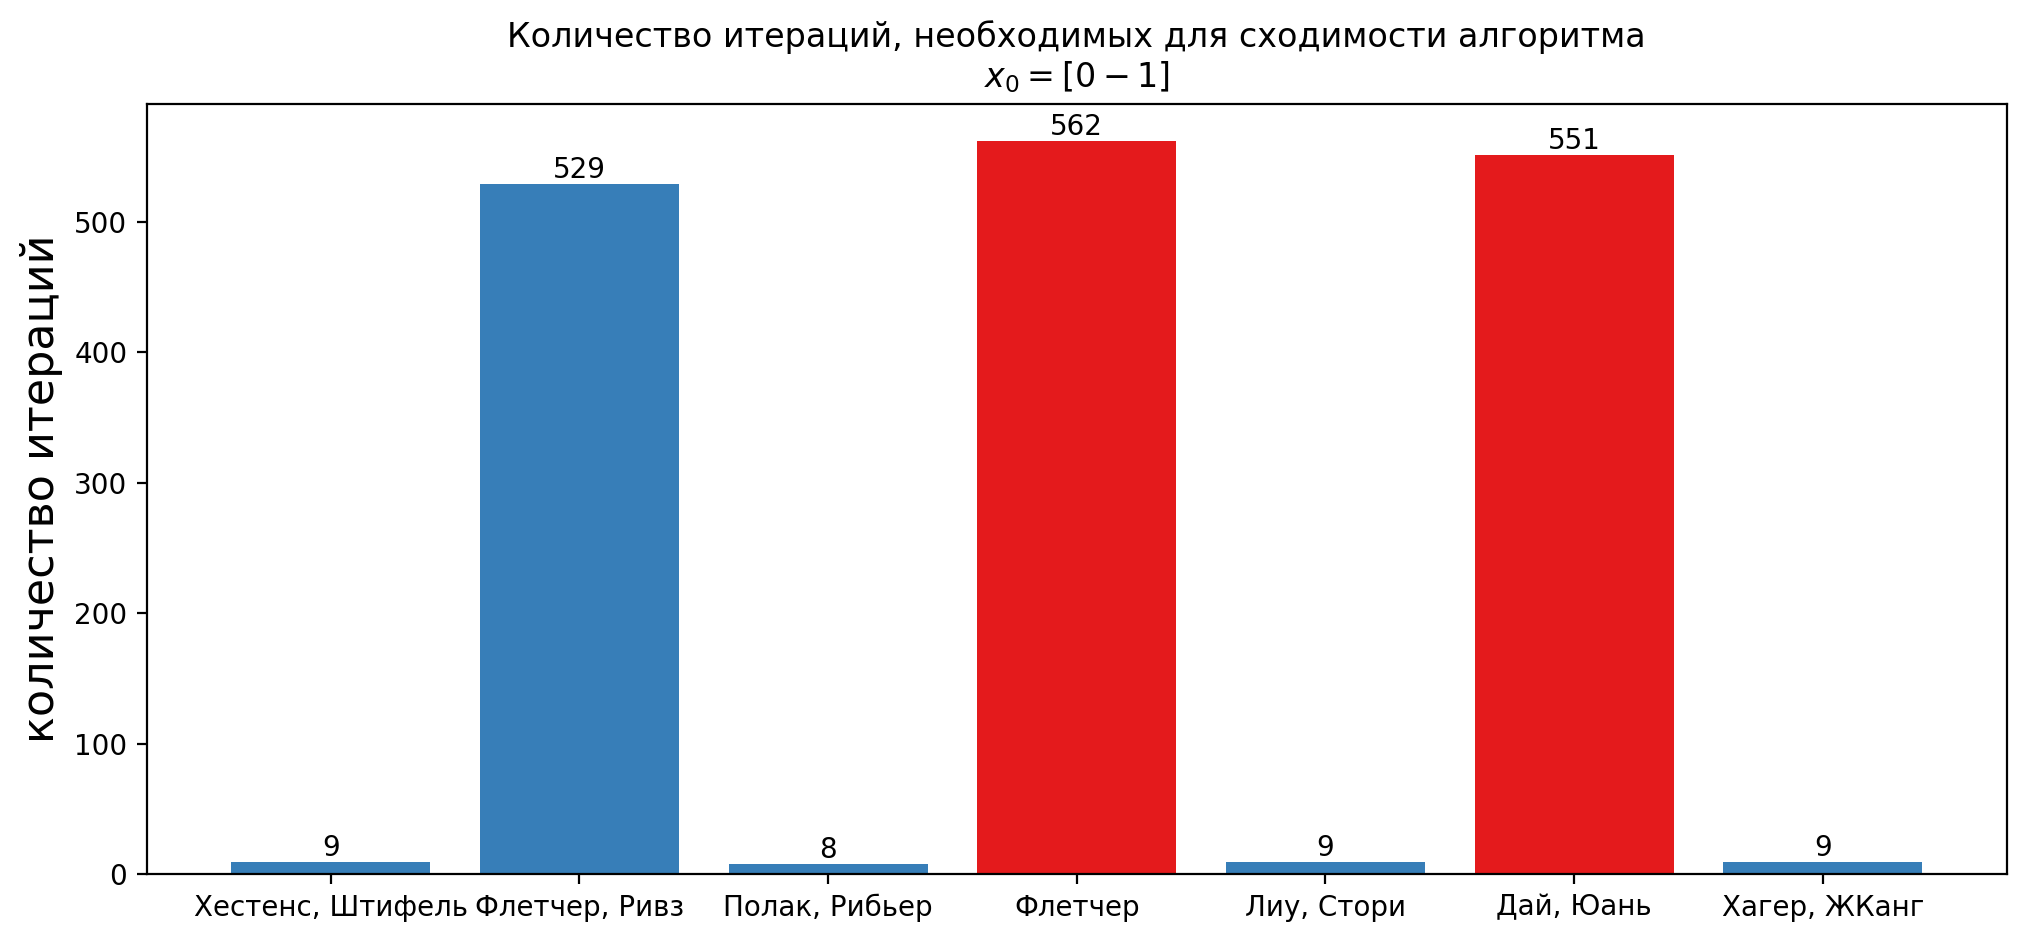

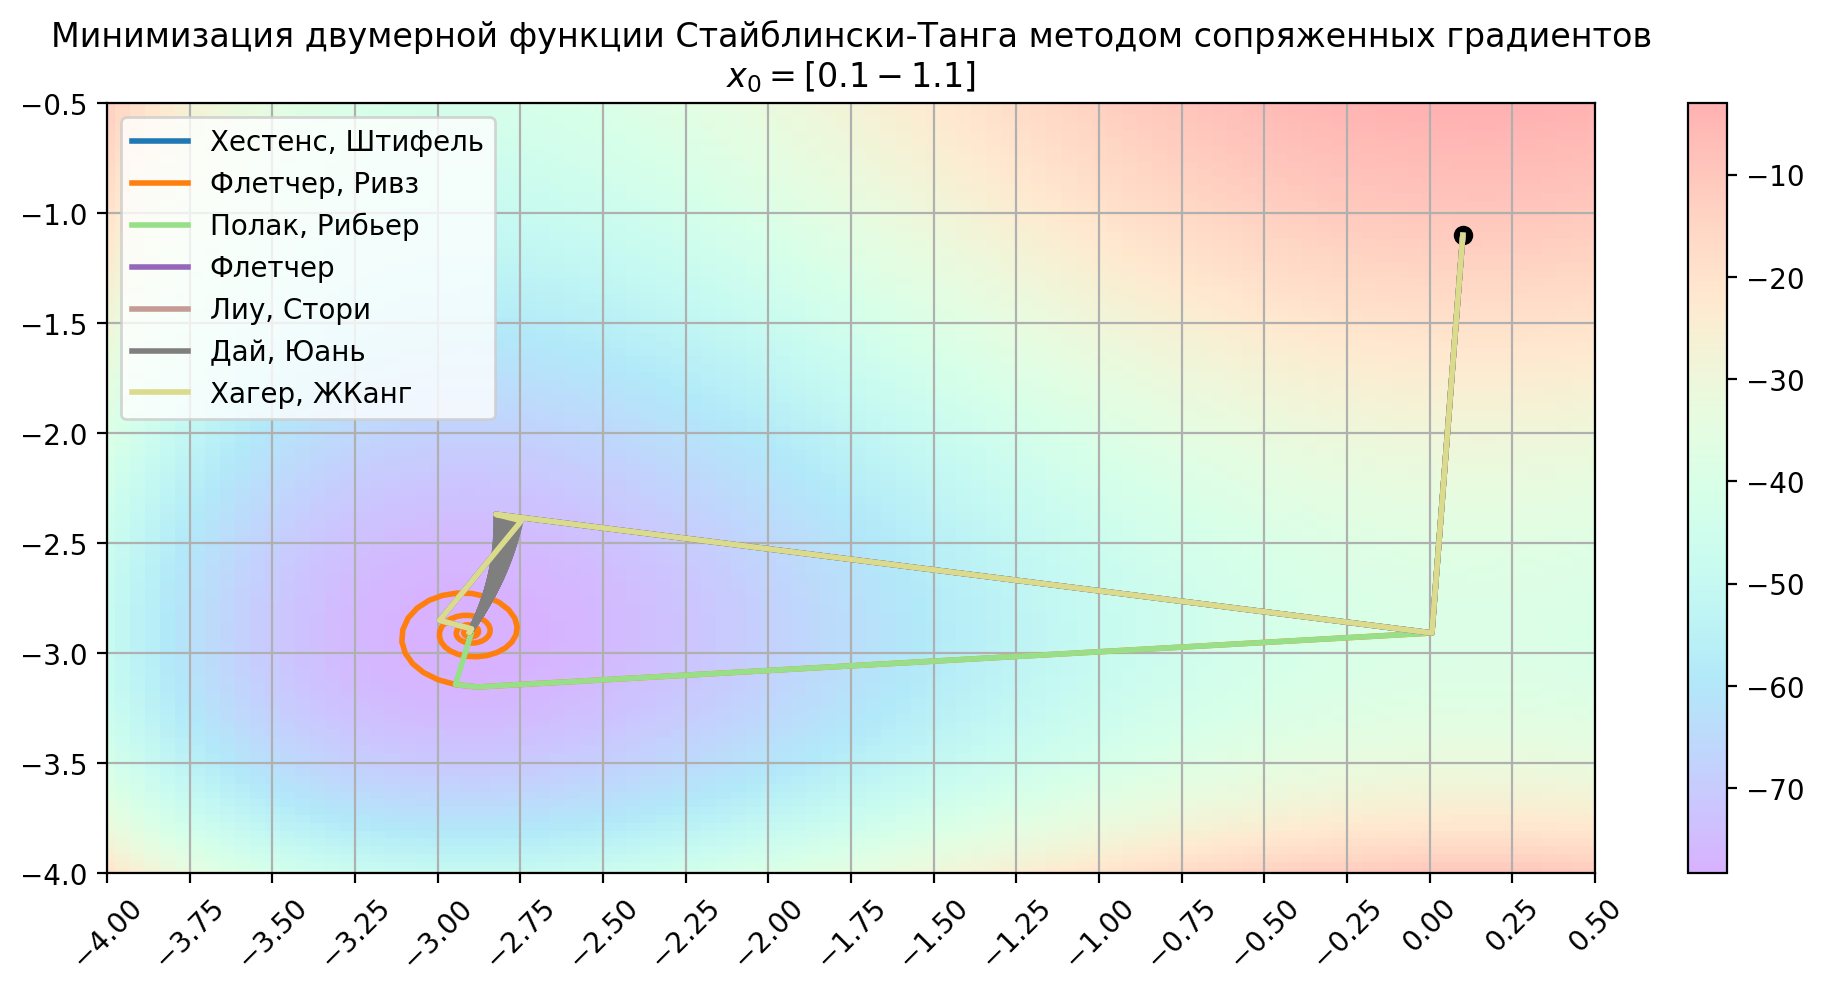

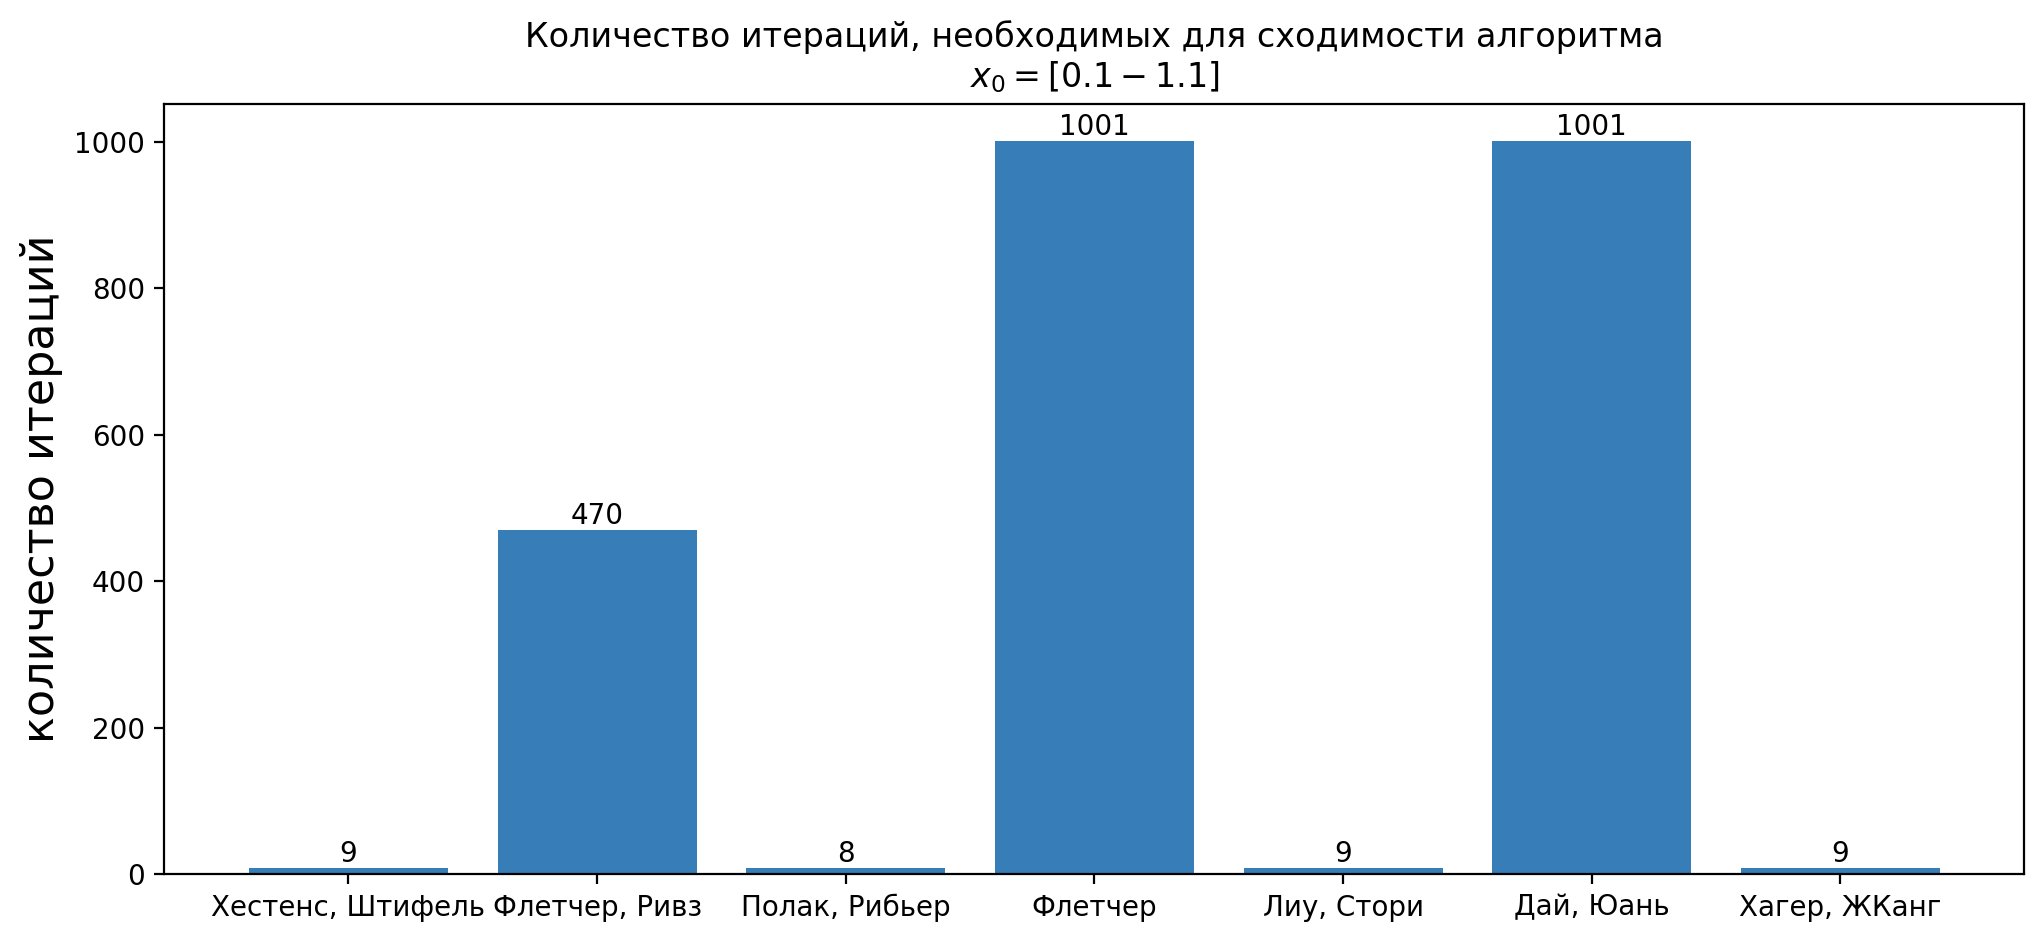

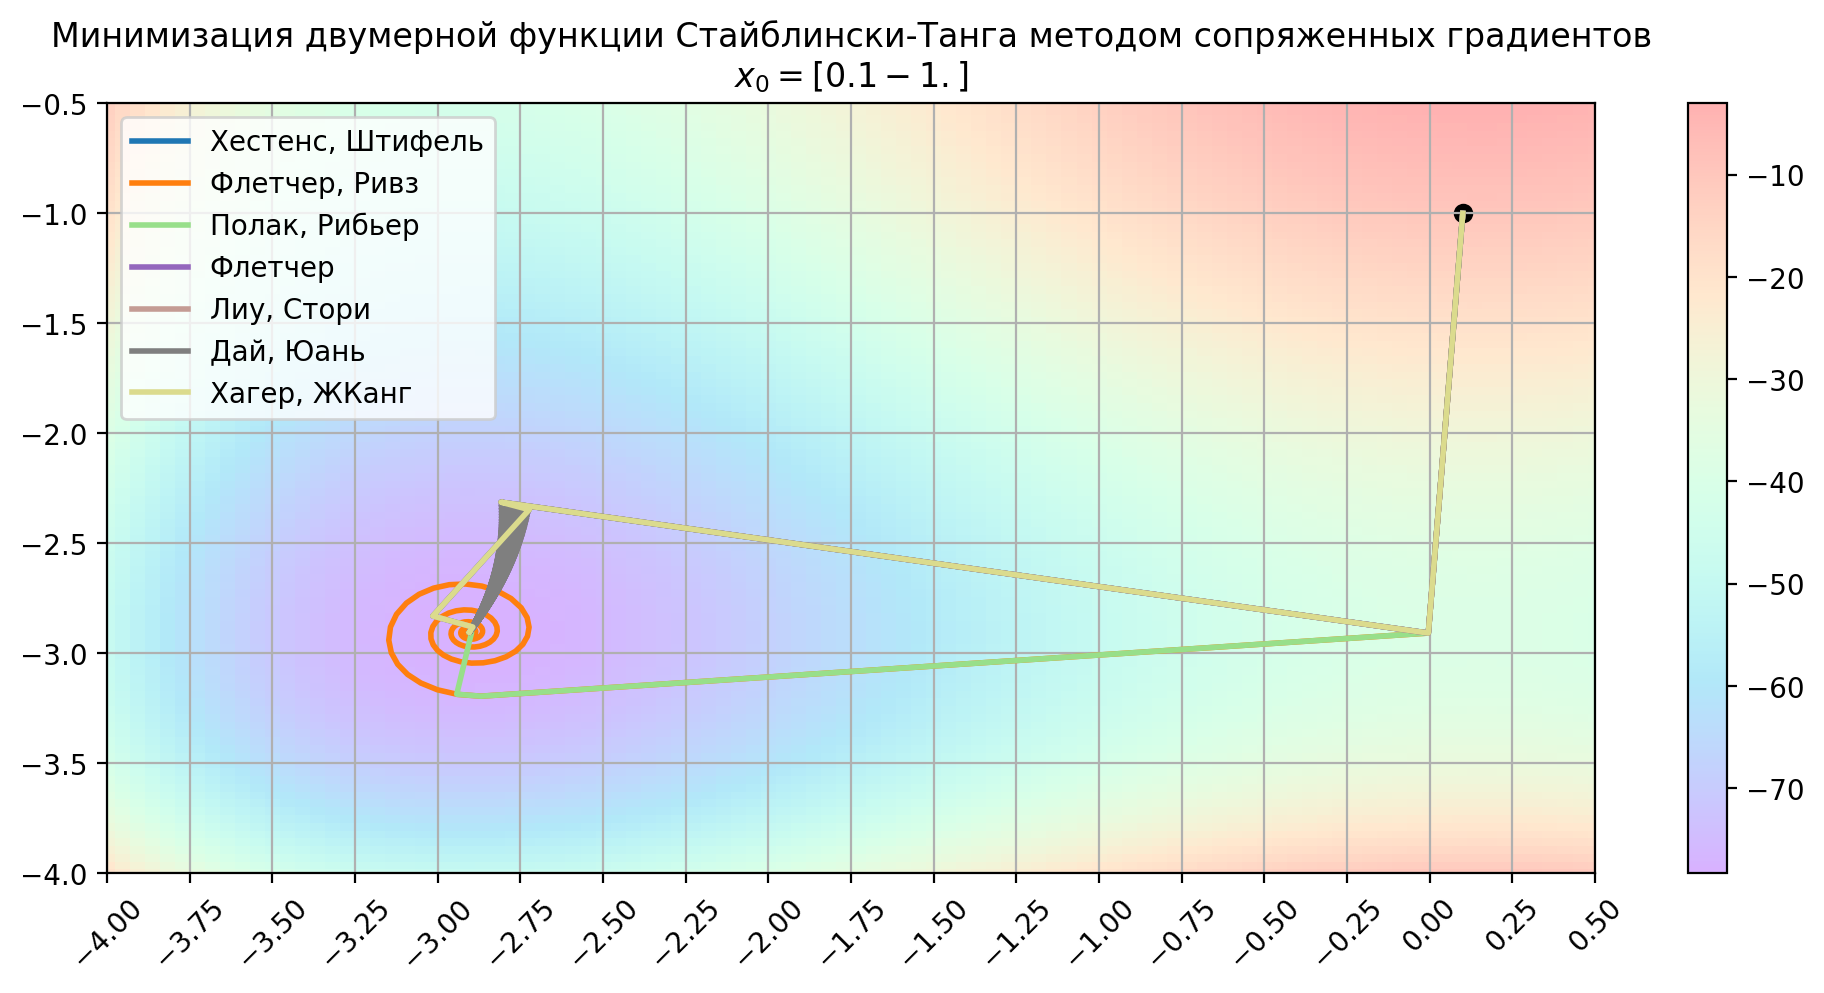

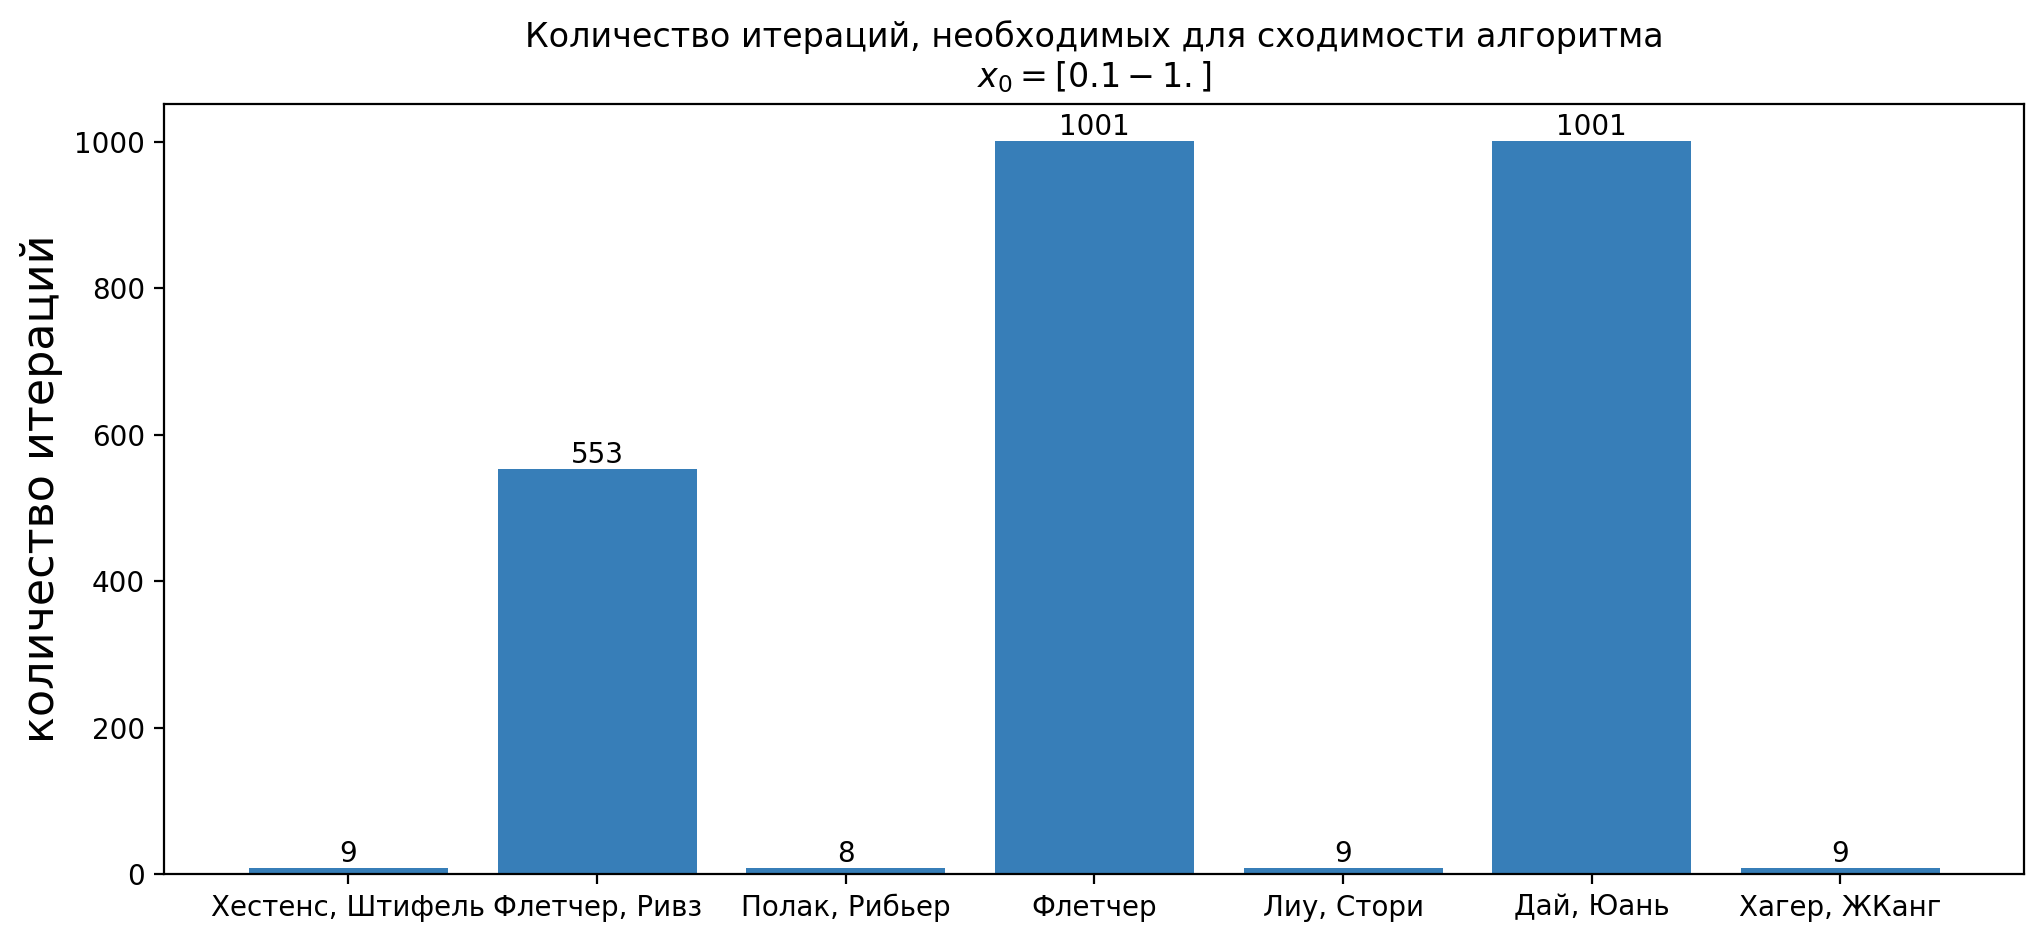

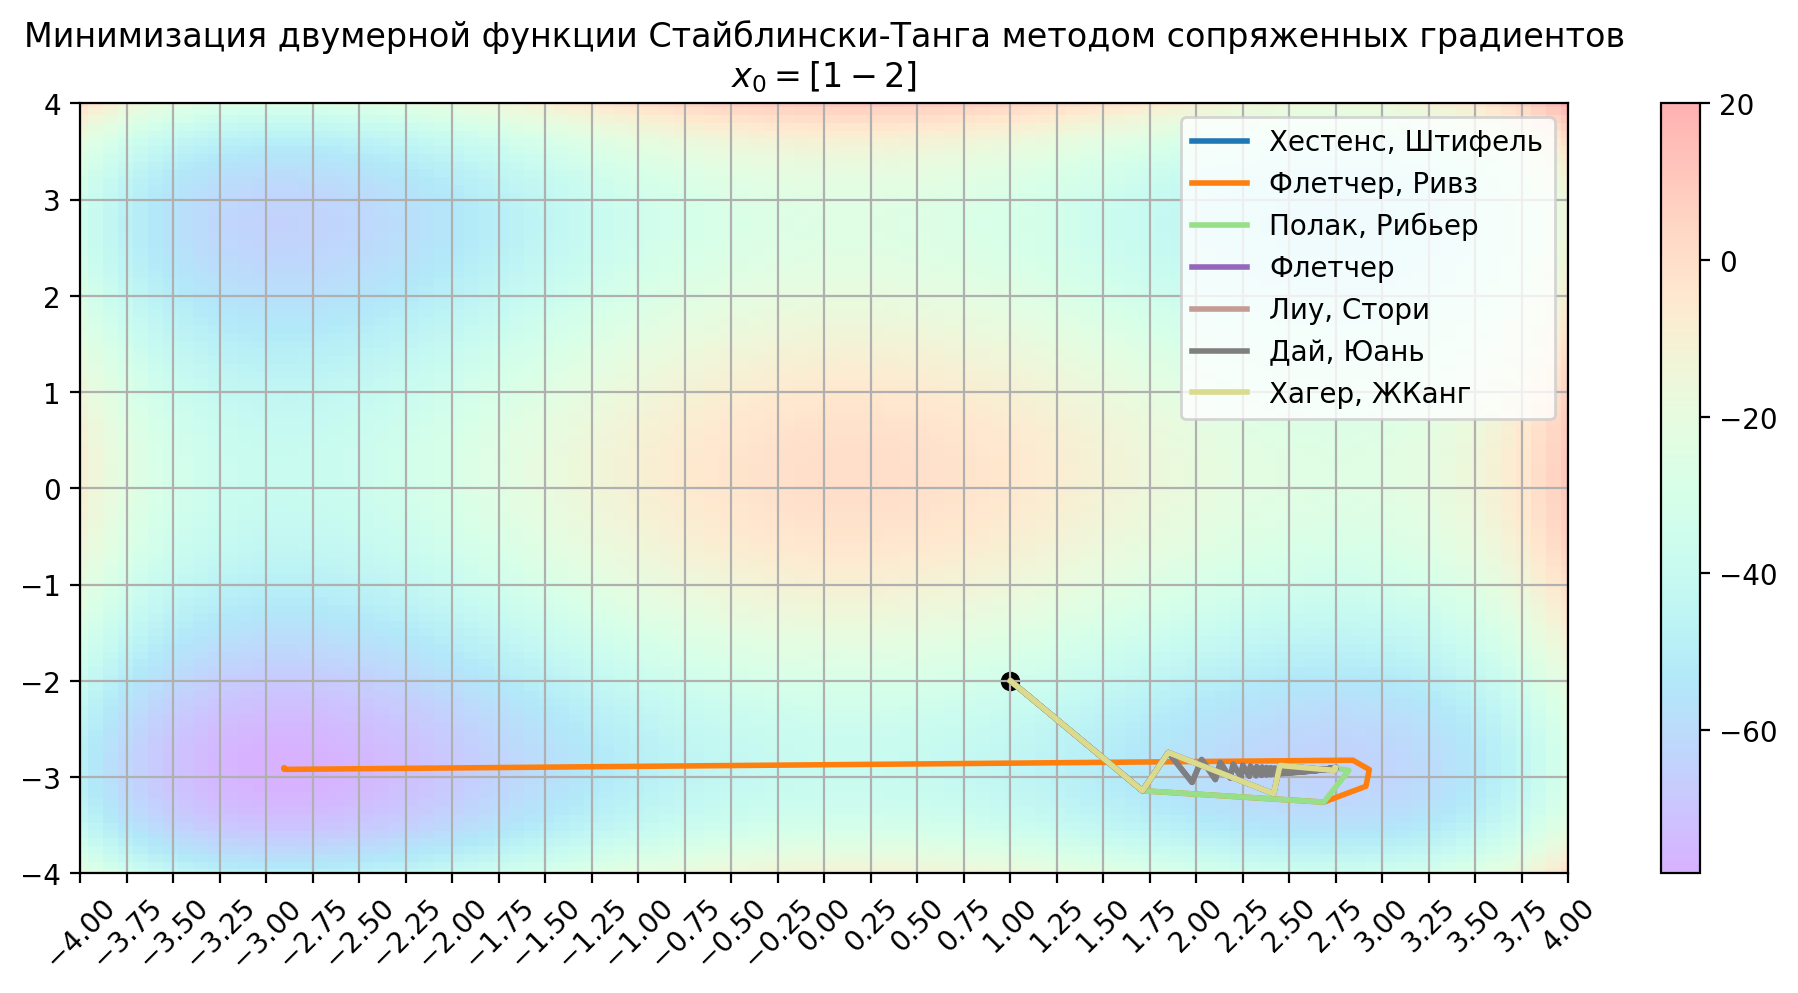

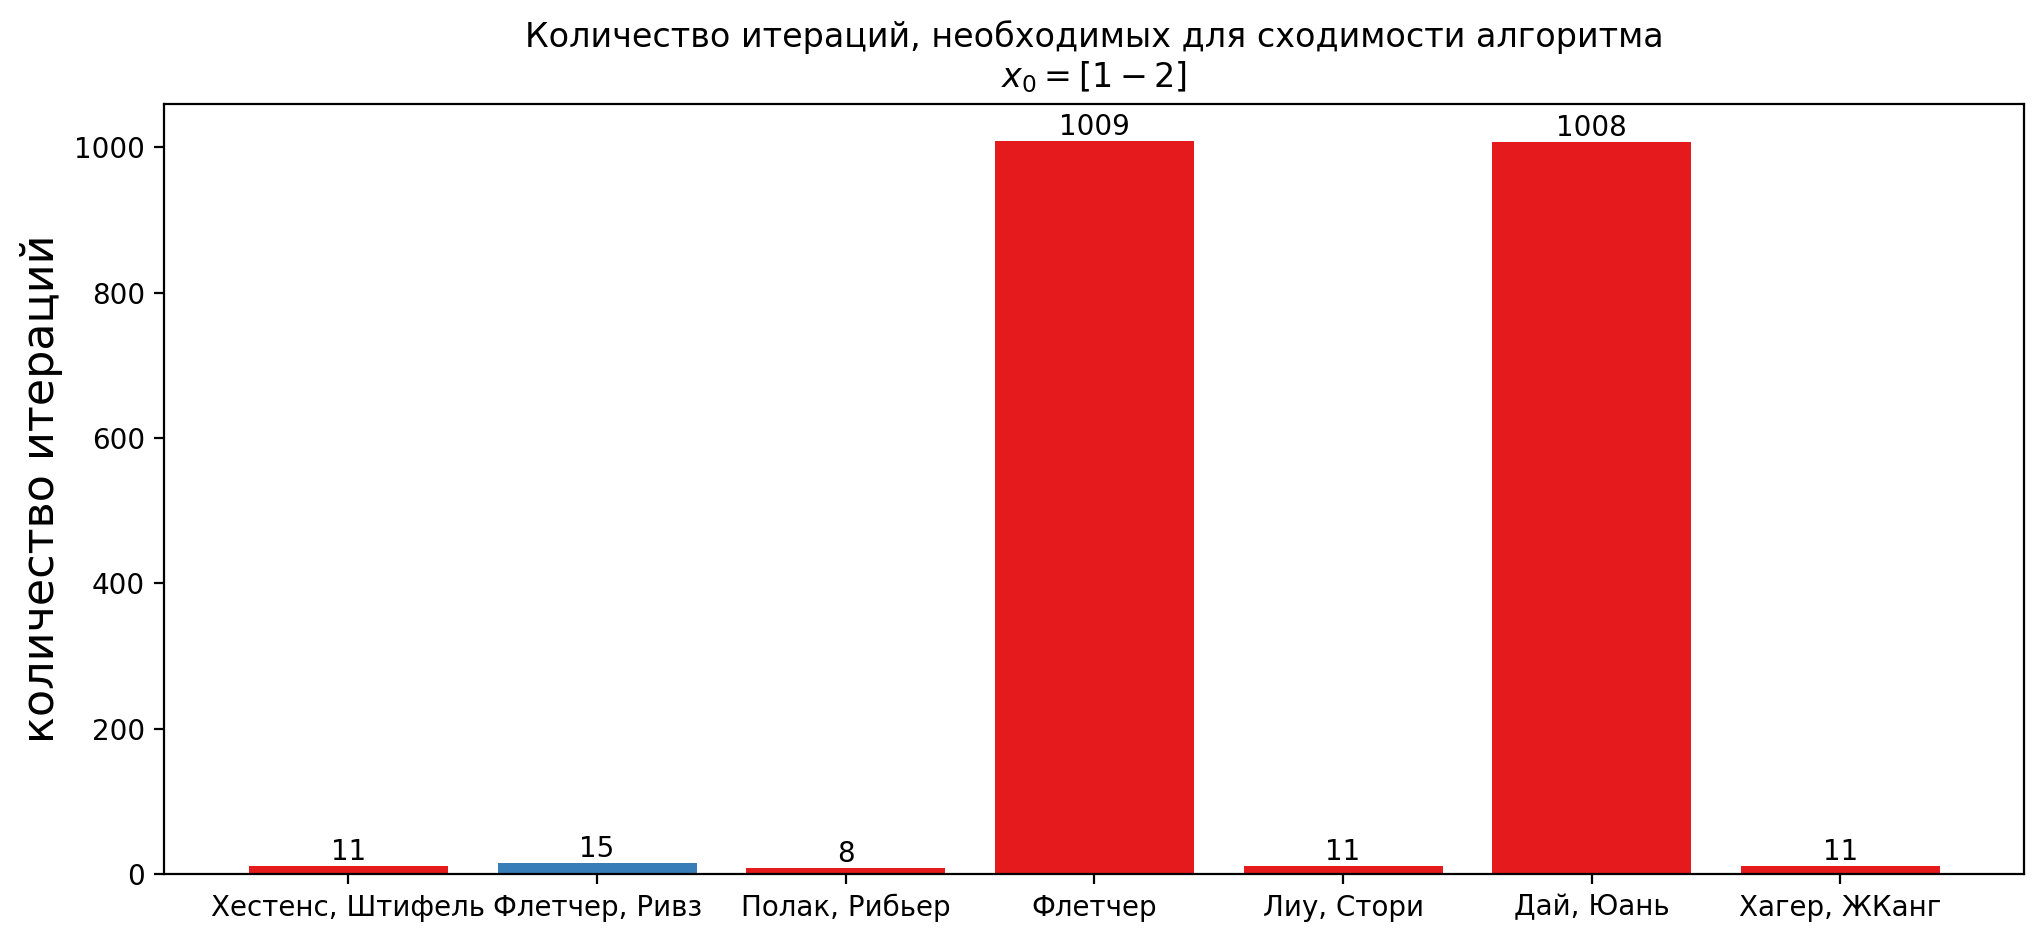

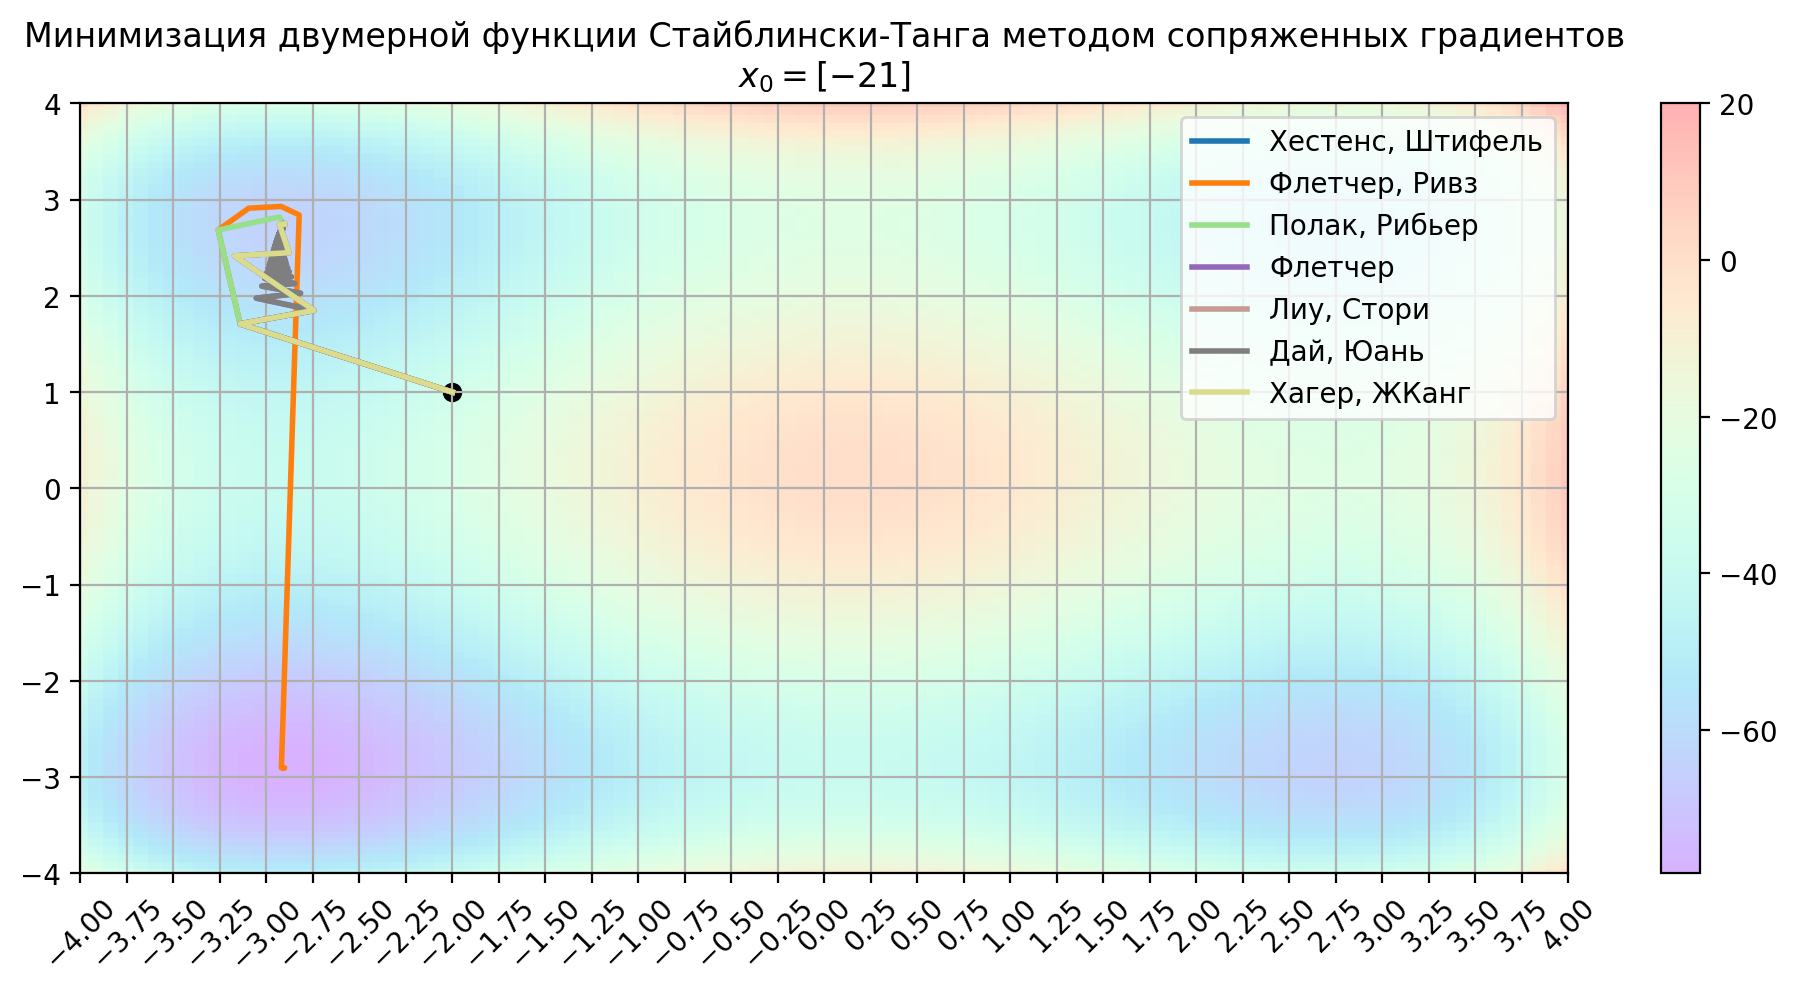

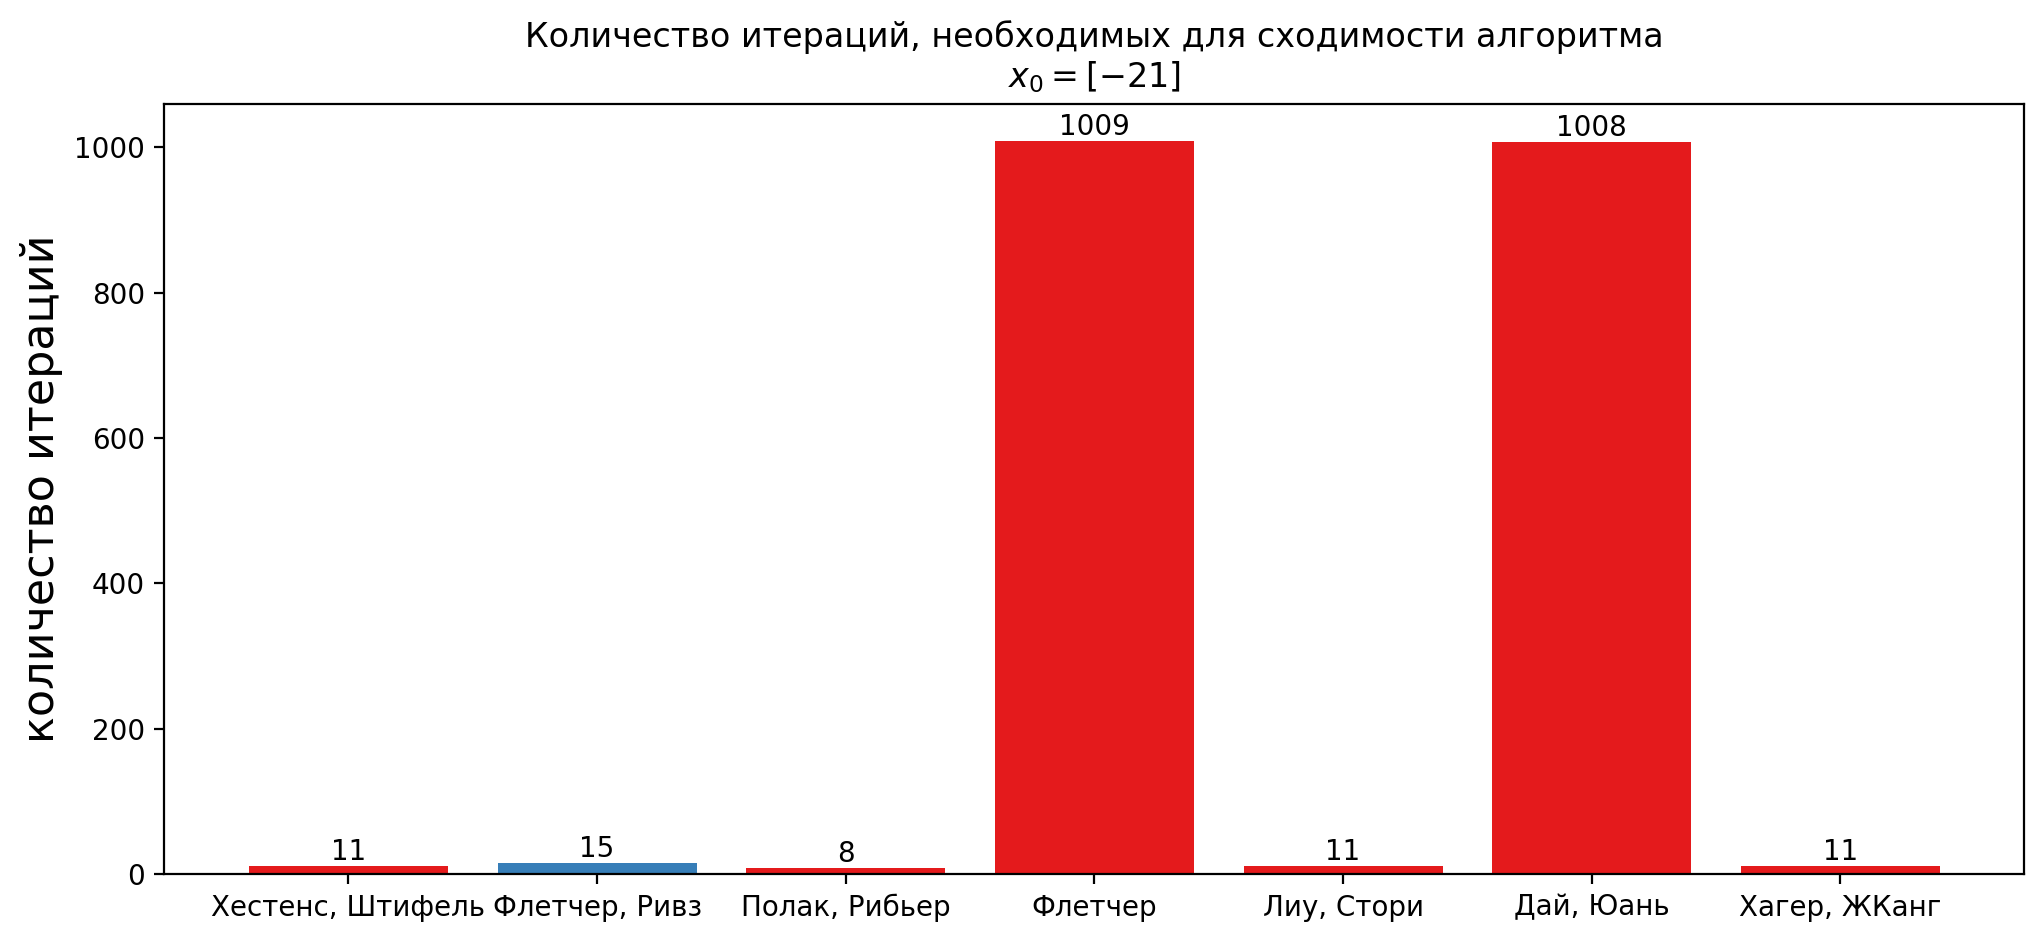

In [13]:
phi_minimization_method = lambda func: opt.minimize_scalar(func).x

Bk_callable = [Hestenes_Stiefel, Fletcher_Rievs, Polak_Ribier, Fletcher, Liu_Stei, Dai_Yuan, Hager_Zhang]
Bk_name = ['Хестенс, Штифель', 'Флетчер, Ривз', 'Полак, Рибьер', 'Флетчер', 'Лиу, Стори', 'Дай, Юань', 'Хагер, ЖКанг']


x_start_values = [np.array([0, -1]), np.array([0.1, -1.1]), np.array([0.1, -1]), np.array([1, -2]),  np.array([-2, 1])]

for global_iteration, x_start in enumerate(x_start_values):
    Bk_history, nice_res = [], []
    for Bk_method, name in zip(Bk_callable, Bk_name):
        x, history = minimize(f, grad_f, x0 = x_start, Bk = Bk_method, phi_minimization = phi_minimization_method)
        x, history2 = minimize(f, grad_f, x0 = x, Bk = Bk_method, phi_minimization = phi_minimization_method)
        history = np.vstack([history, history2])
        Bk_history.append(history)
        nice_res.append(np.allclose(x, [-2.904, -2.904], rtol = 0.0025))
    if global_iteration in [len(x_start_values) - 1, len(x_start_values) - 2]: plot_curves(Bk_name, Bk_history, x_start, 4, 4)
    else:   plot_curves(Bk_name, Bk_history, x_start)
    plt.savefig(f'curves_{global_iteration}.png')
    plot_iteration_bar(Bk_name, Bk_history, x_start, nice_res)
    plt.savefig(f'bars_{global_iteration}.png')
    